## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Jun 17 11:04:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
# # %cd {HOME}
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="ev9Iyuz1onBdGCuDP9Sn")
project = rf.workspace("tranvanthuong2303-gmail-com").project("test-zi7dj")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
   

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-1 in yolov8:: 100%|██████████| 3148/3148 [00:00<00:00, 5586.34it/s]


## Custom Training

In [ ]:
dataset.location


'/content/datasets/test-1'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 169MB/s] 
New https://pypi.org/project/ultralytics/8.2.34 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/test-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fa

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1718622410.8330245a39fb.1616.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


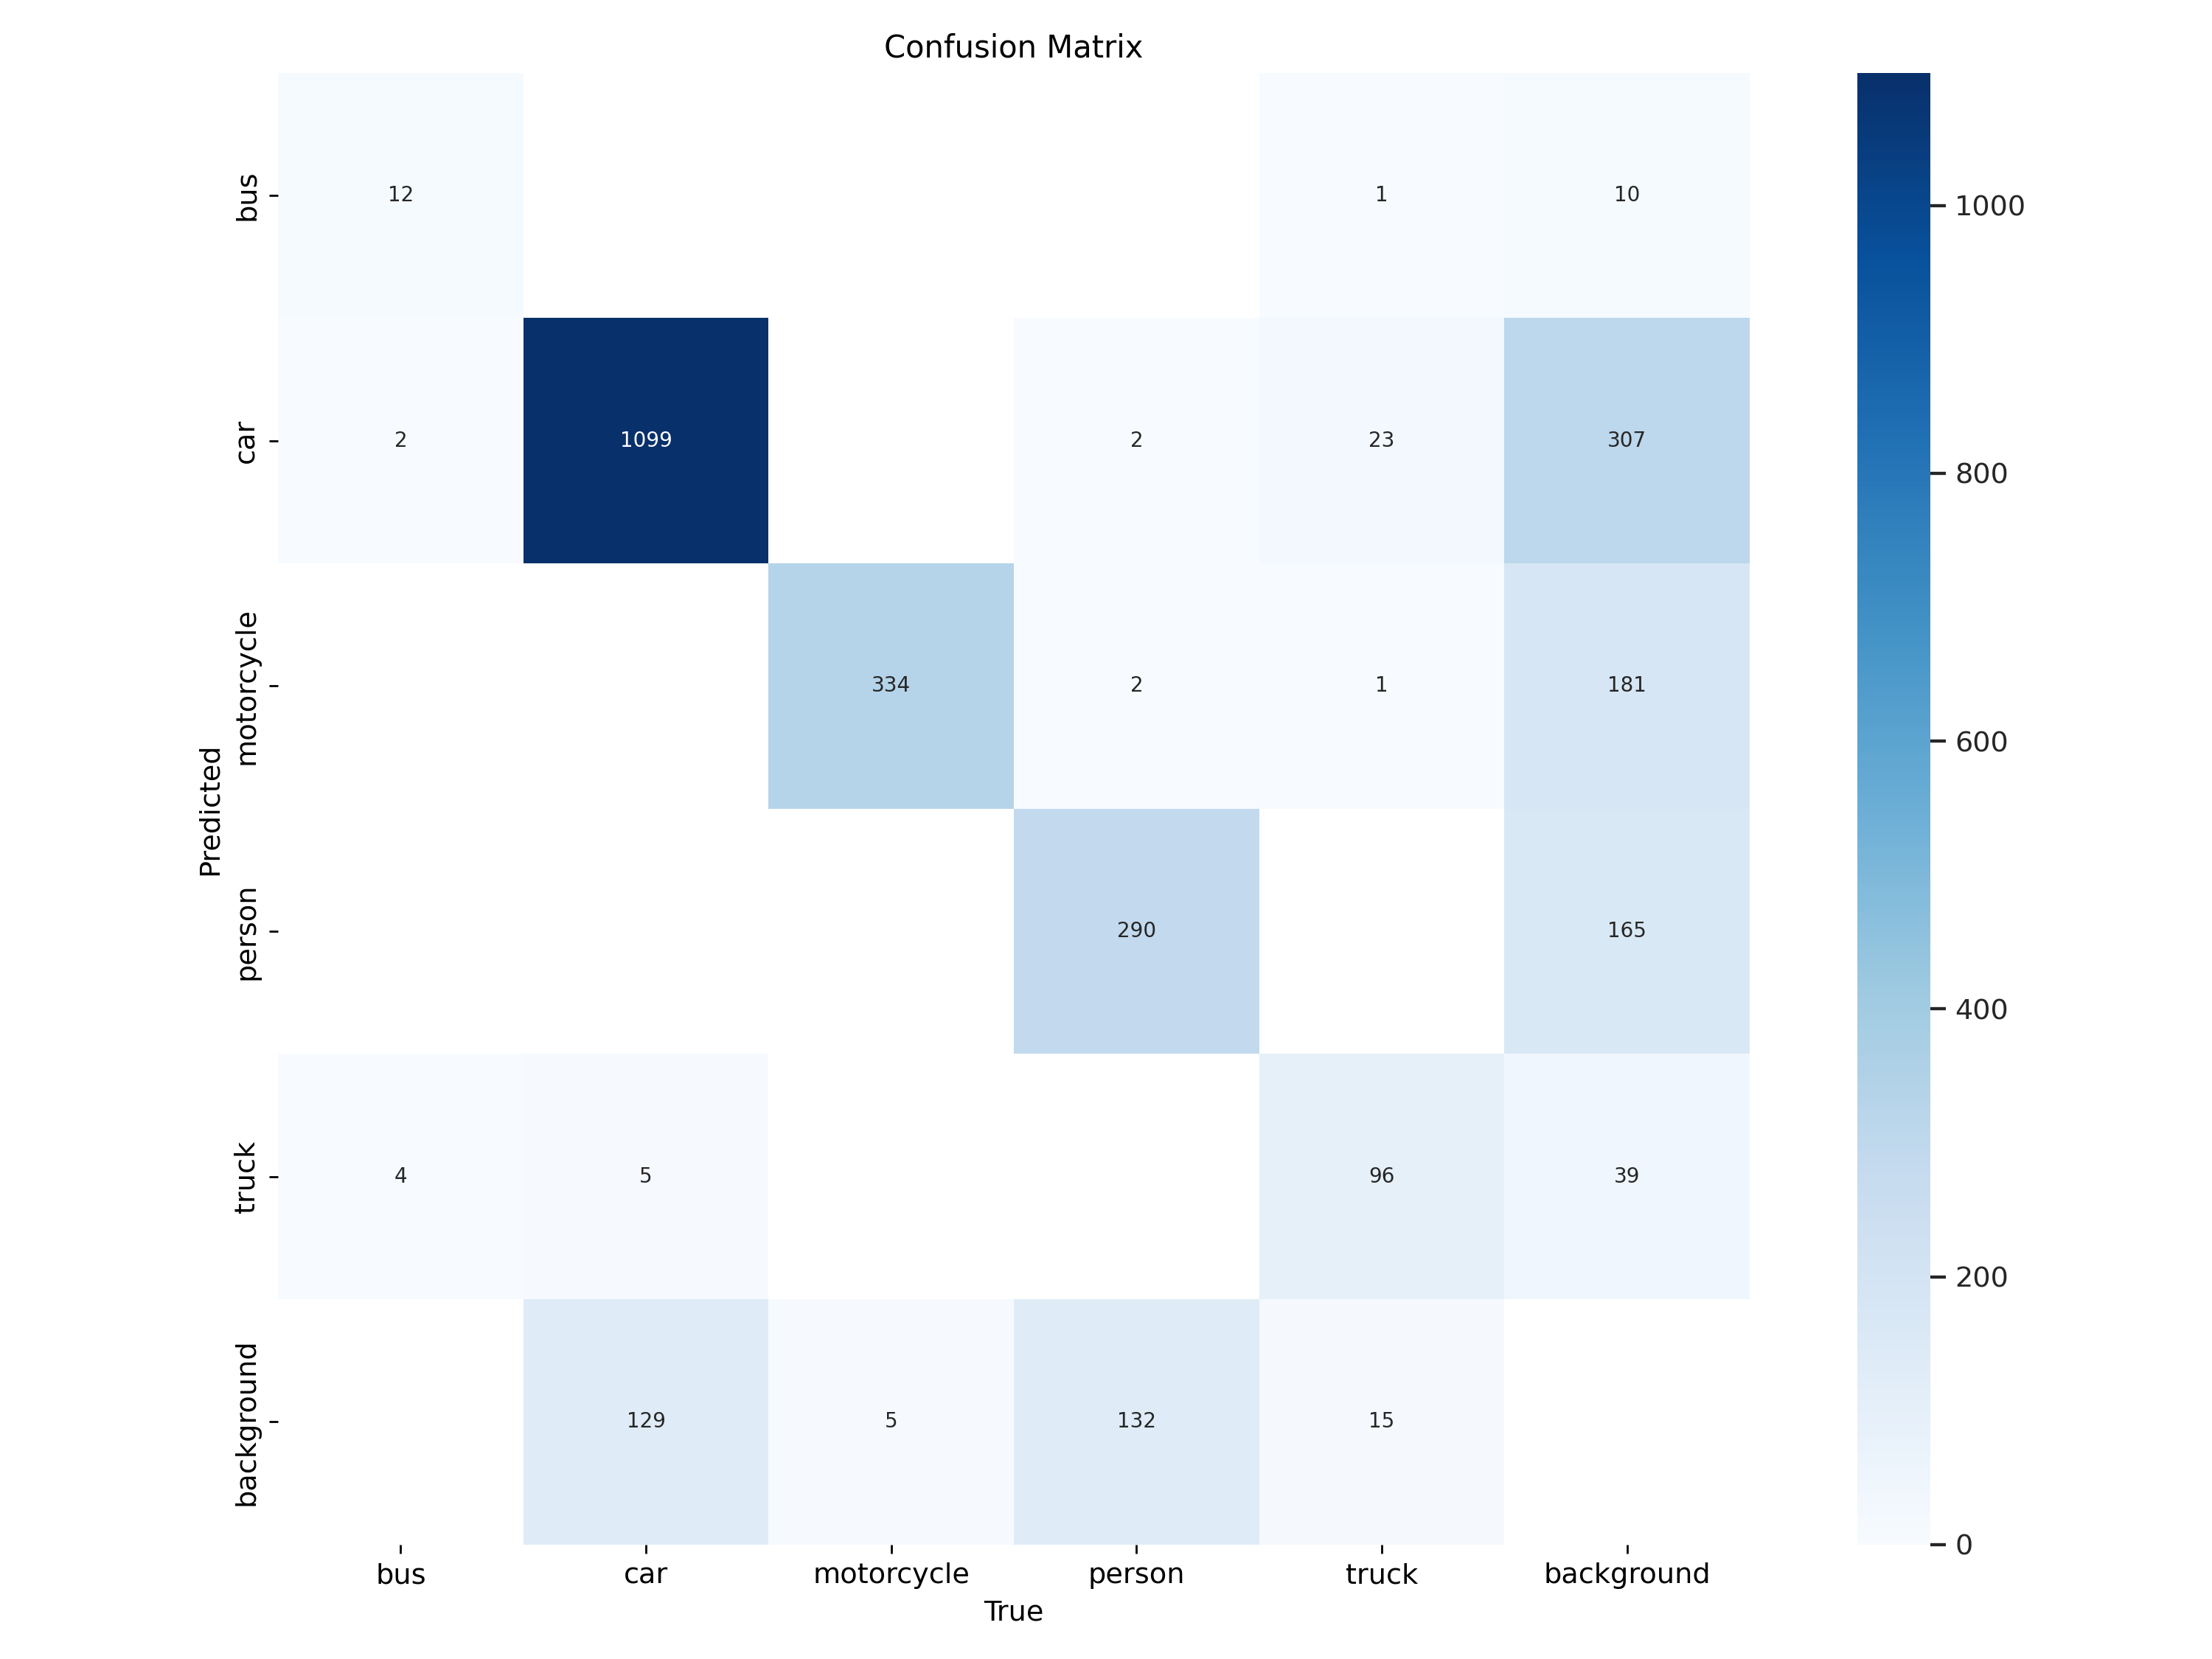

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


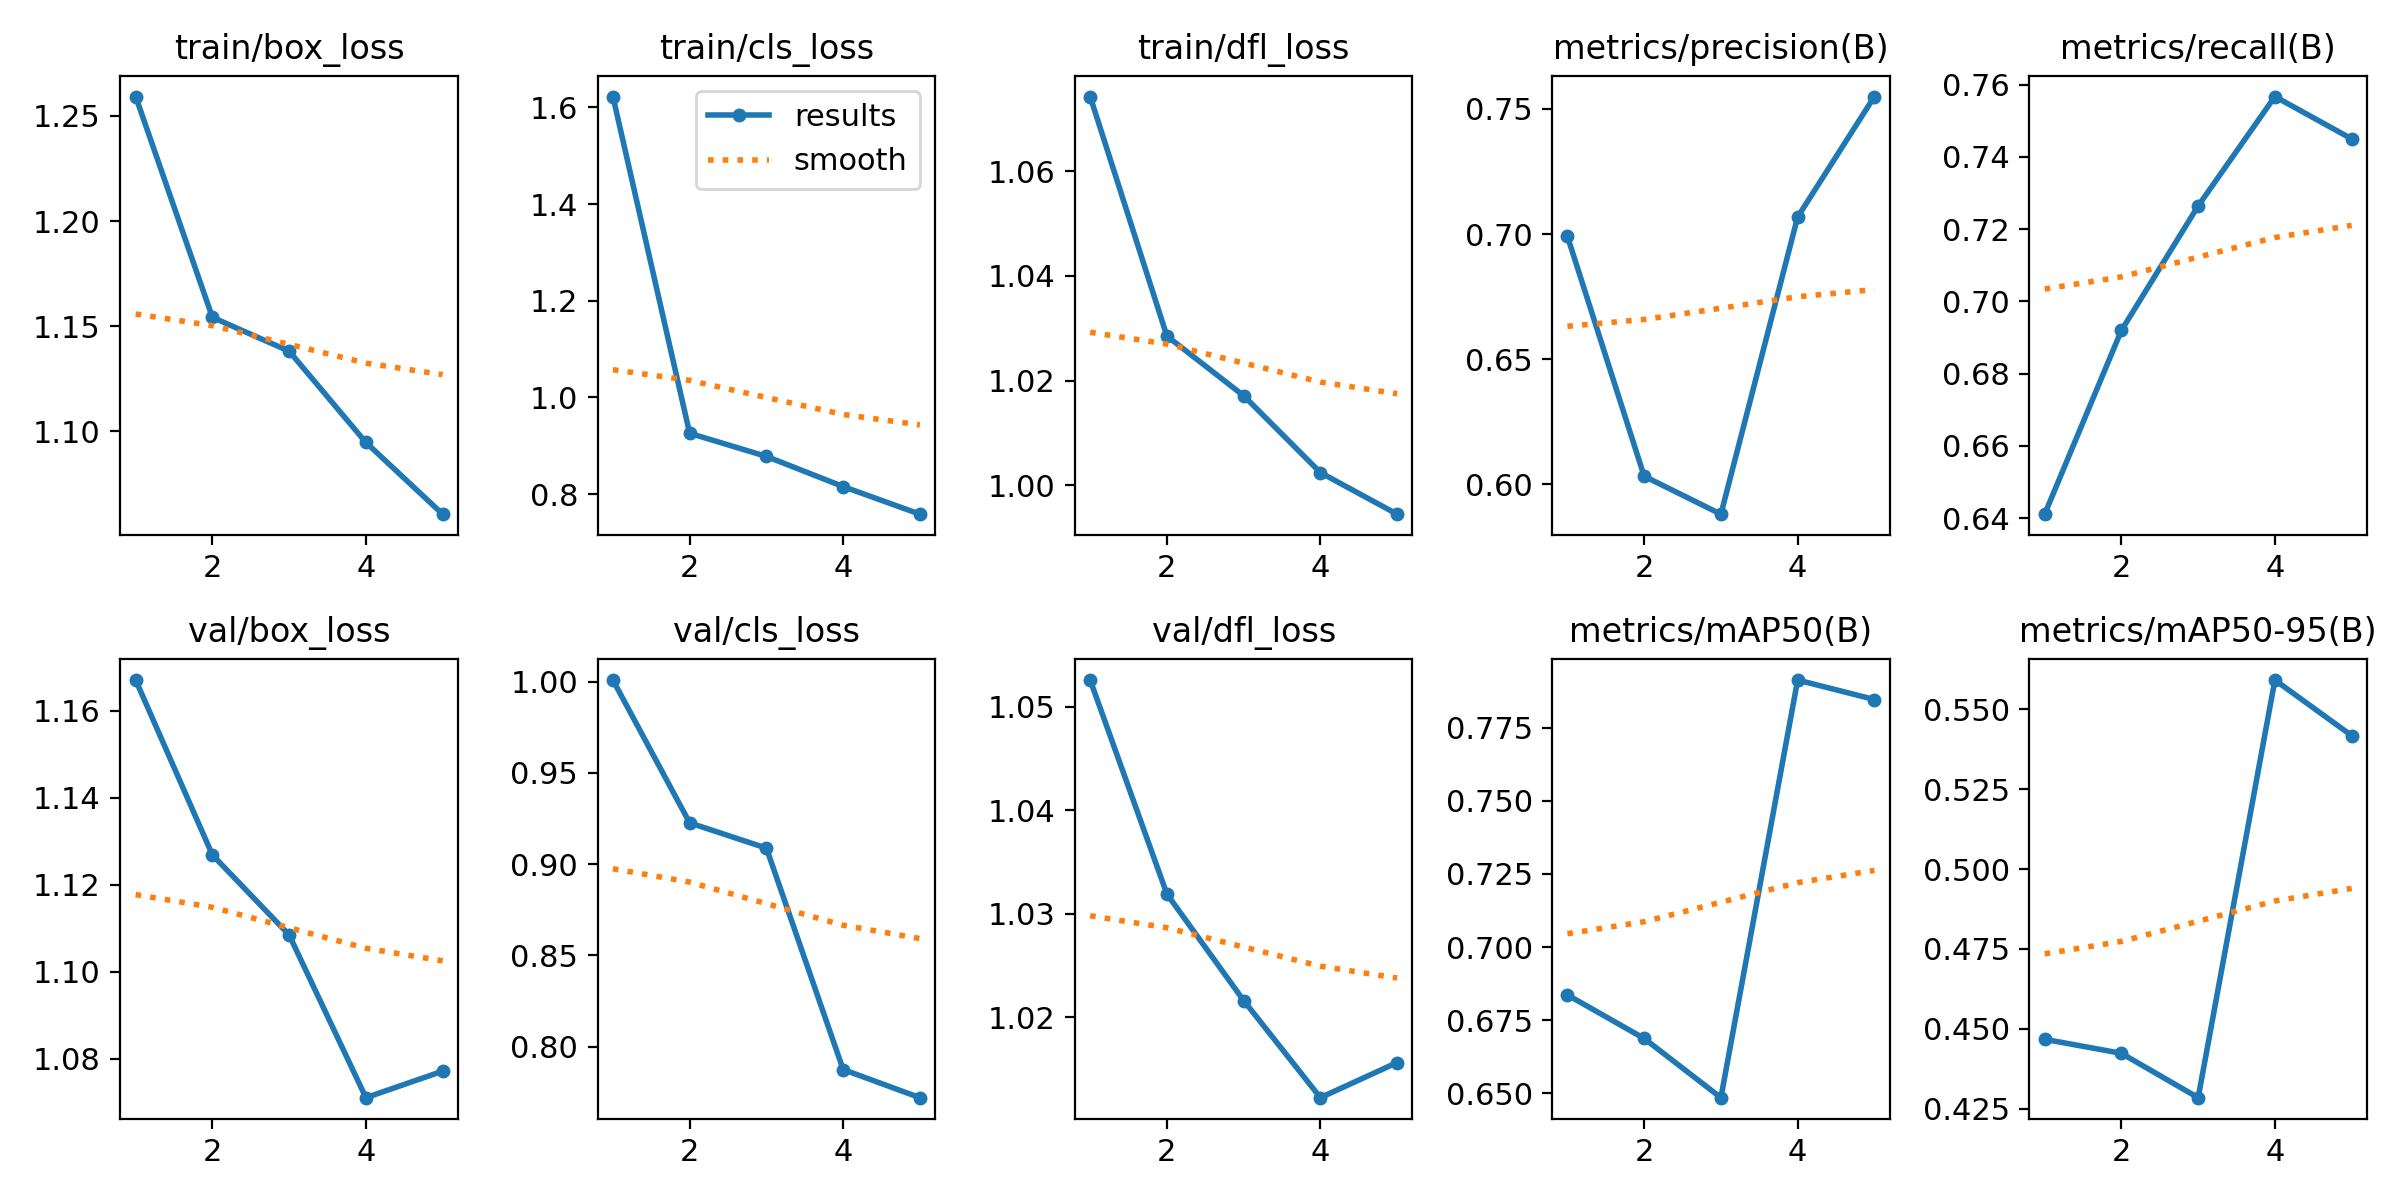

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


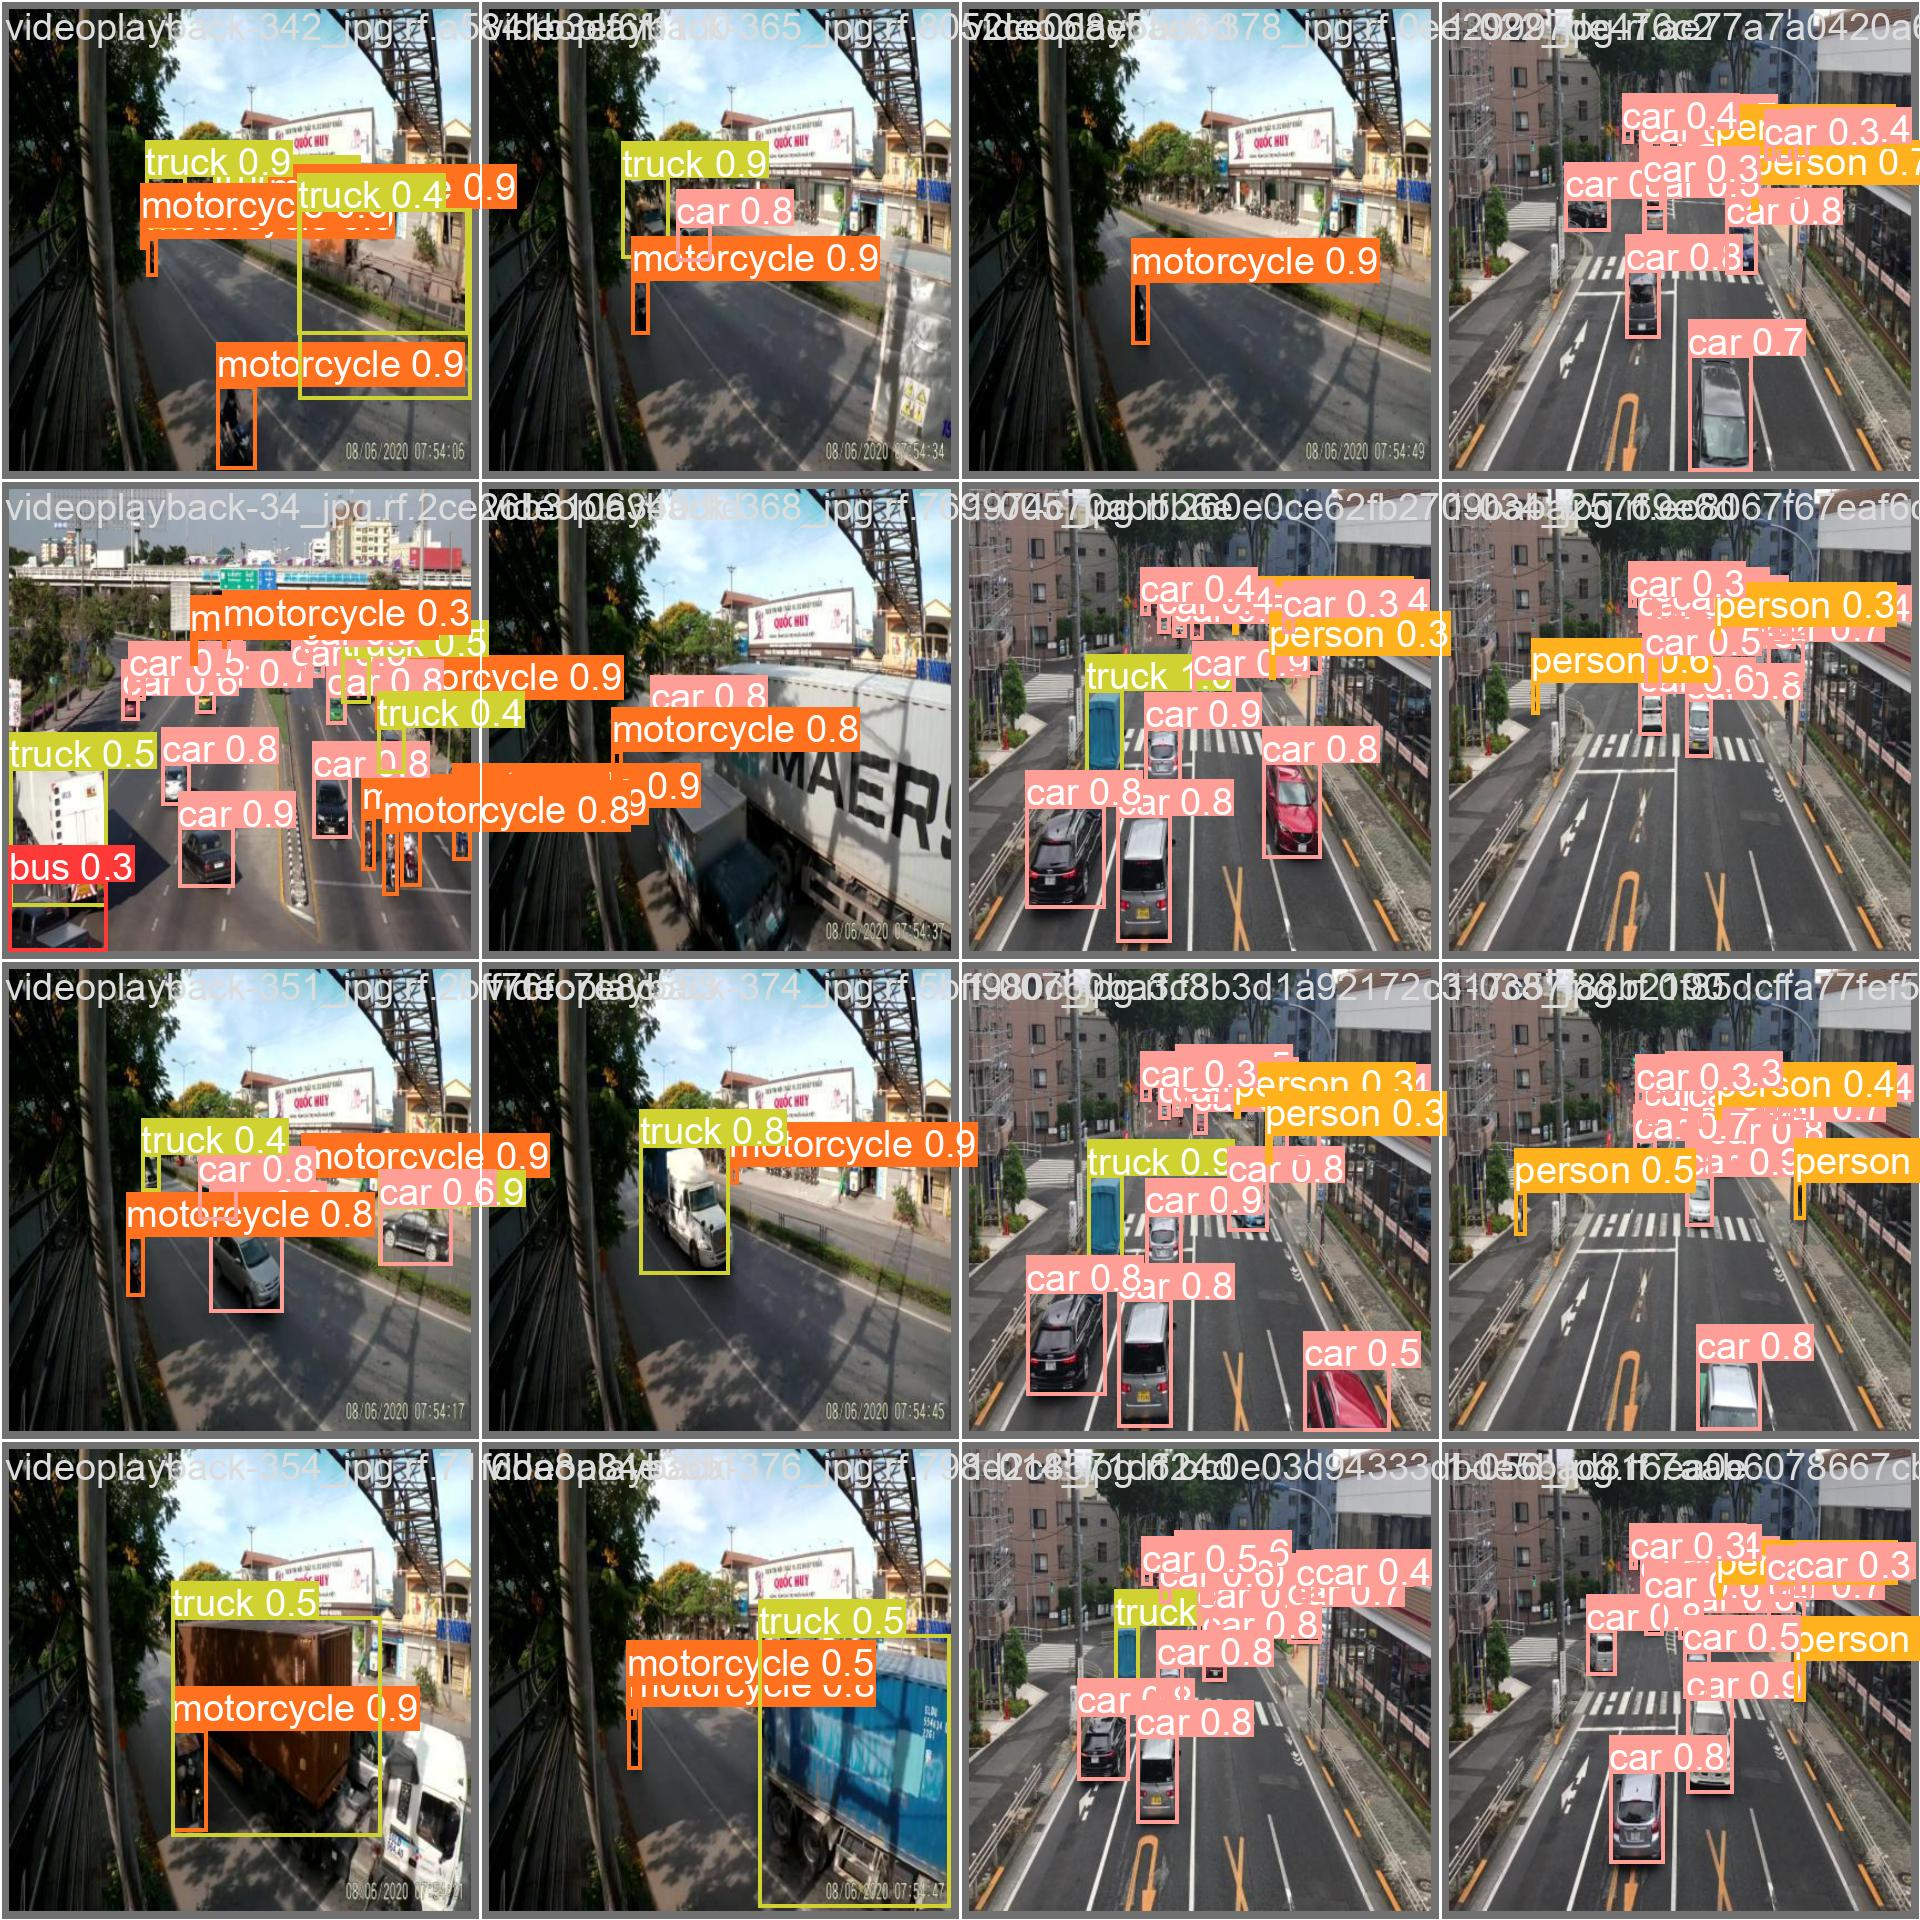

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/test-1/valid/labels.cache... 235 images, 1 backgrounds, 0 corrupt: 100% 235/235 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:20<00:00,  1.37s/it]
                   all        235       2152      0.707      0.759      0.792      0.559
                   bus        235         18      0.577      0.667      0.658      0.525
                   car        235       1233      0.807       0.84      0.879      0.641
            motorcycle        235        339      0.704      0.985      0.964      0.673
                person        235        426      0.702      0.576      0.686       0.39
                 truck        235        136      0.744      0.725      0.773      0.567
Speed: 8.4ms preprocess, 17.2ms i

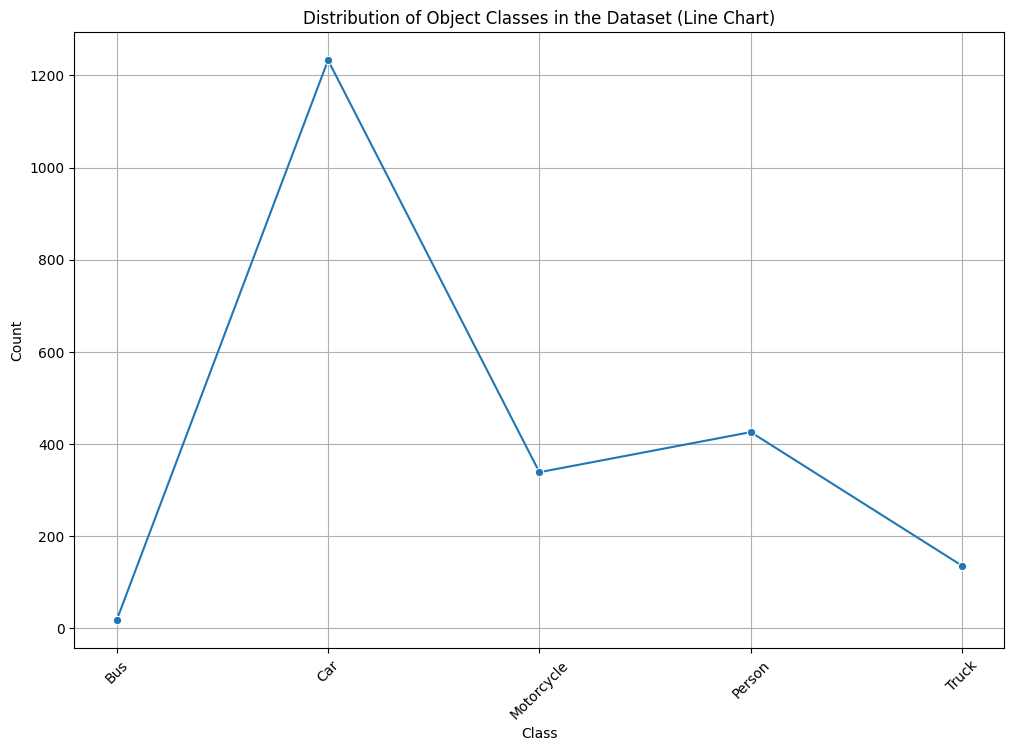

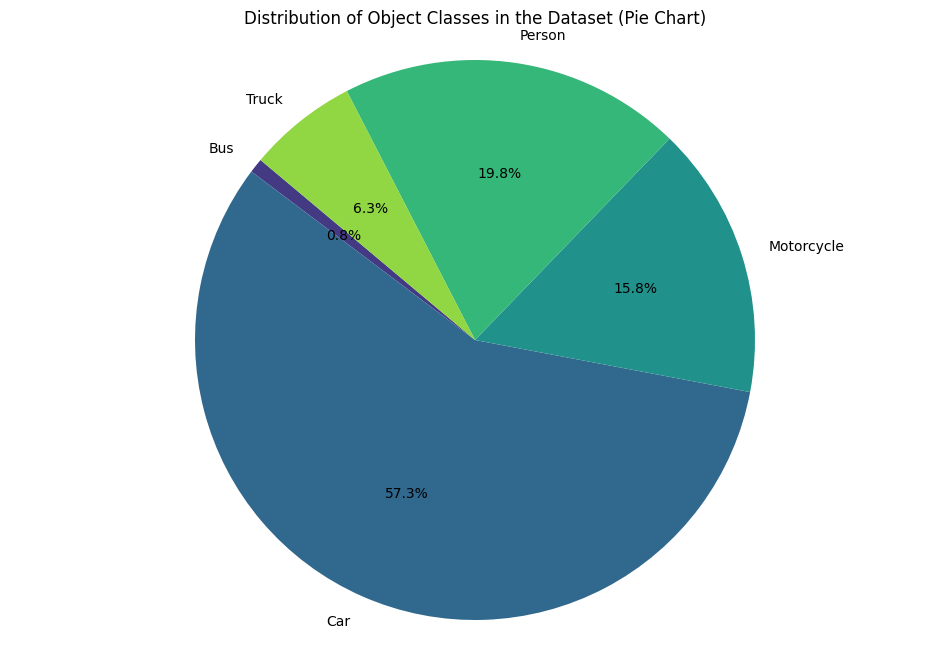

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Parsing file anotasi untuk mendapatkan distribusi objek
annotations_dir = os.path.join(dataset.location, "valid", "labels")
class_counts = {}

for filename in os.listdir(annotations_dir):
    if filename.endswith(".txt"):
        with open(os.path.join(annotations_dir, filename), "r") as file:
            for line in file:
                class_id = line.split()[0]
                if class_id in class_counts:
                    class_counts[class_id] += 1
                else:
                    class_counts[class_id] = 1

# Definisi class names
class_names = {0: 'Bus', 1: 'Car', 2: 'Motorcycle', 3: 'Person', 4: 'Truck'}

# Mengubah class_counts menjadi list untuk visualisasi
# Urutkan berdasarkan urutan yang diinginkan (berdasarkan class_names)
sorted_class_ids = sorted(class_counts.keys(), key=lambda x: int(x))
sorted_classes = [class_names[int(class_id)] for class_id in sorted_class_ids]
sorted_counts = [class_counts[class_id] for class_id in sorted_class_ids]

# Membuat visualisasi distribusi menggunakan matplotlib dan seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x=sorted_classes, y=sorted_counts, marker='o')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Object Classes in the Dataset (Line Chart)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Membuat pie chart menggunakan matplotlib
plt.figure(figsize=(12, 8))
plt.pie(sorted_counts, labels=sorted_classes, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(sorted_classes)))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Object Classes in the Dataset (Pie Chart)")
plt.show()




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



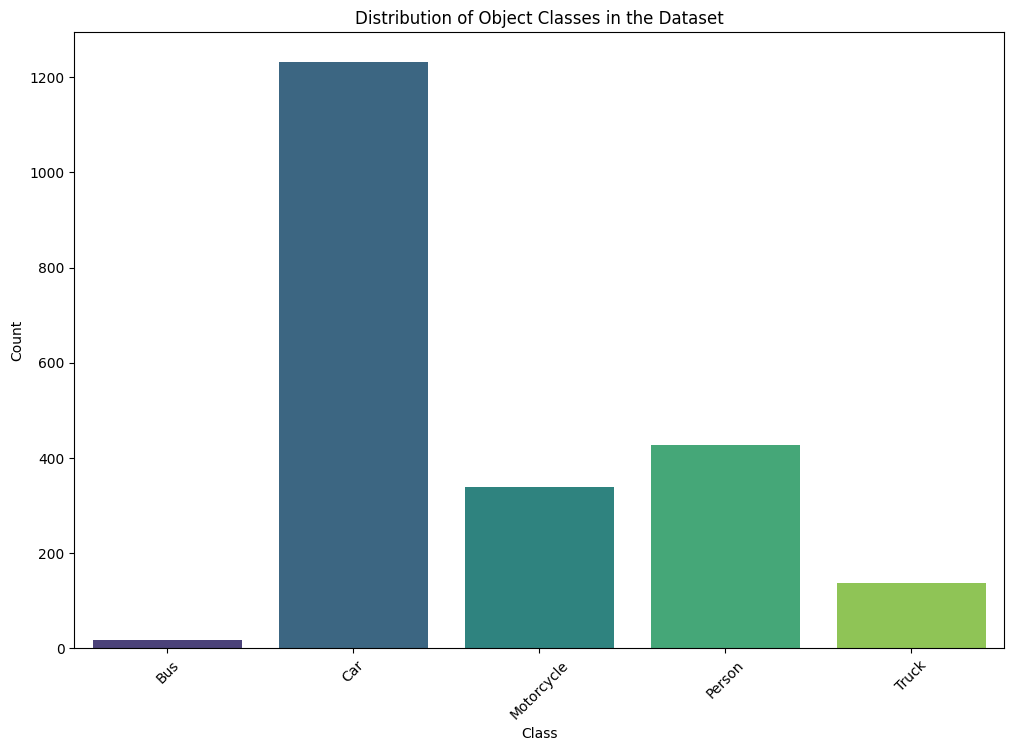

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Parsing file anotasi untuk mendapatkan distribusi objek
annotations_dir = os.path.join(dataset.location, "valid", "labels")
class_counts = {}

for filename in os.listdir(annotations_dir):
    if filename.endswith(".txt"):
        with open(os.path.join(annotations_dir, filename), "r") as file:
            for line in file:
                class_id = line.split()[0]
                if class_id in class_counts:
                    class_counts[class_id] += 1
                else:
                    class_counts[class_id] = 1

# Definisi class names
# bus, car, motorcycle, person, truck
class_names = {0: 'Bus', 1: 'Car', 2: 'Motorcycle', 3: 'Person', 4: 'Truck'}

# Mengubah class_counts menjadi list untuk visualisasi
# Urutkan berdasarkan urutan yang diinginkan (berdasarkan class_names)
sorted_class_ids = sorted(class_counts.keys(), key=lambda x: int(x))
sorted_classes = [class_names[int(class_id)] for class_id in sorted_class_ids]
sorted_counts = [class_counts[class_id] for class_id in sorted_class_ids]

# Membuat visualisasi distribusi menggunakan matplotlib dan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_classes, y=sorted_counts, palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Object Classes in the Dataset")
plt.xticks(rotation=45)
plt.show()


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/157 /content/datasets/test-1/test/images/1-036_jpg.rf.8fd2458cbe5ec94392ad84835b3a355b.jpg: 800x800 12 cars, 1 person, 22.5ms
image 2/157 /content/datasets/test-1/test/images/1-051_jpg.rf.20fbce036efbaad6dd35c159cd65e58f.jpg: 800x800 16 cars, 2 persons, 22.5ms
image 3/157 /content/datasets/test-1/test/images/1-057_jpg.rf.7eb4b55466897868a4bad0b19acb0038.jpg: 800x800 13 cars, 2 persons, 22.4ms
image 4/157 /content/datasets/test-1/test/images/1-060_jpg.rf.3de1f3872de6a4160c515e3e92febe85.jpg: 800x800 14 cars, 3 persons, 22.4ms
image 5/157 /content/datasets/test-1/test/images/1-075_jpg.rf.849ef2b0e877b1f83bd412c6f12354b4.jpg: 800x800 13 cars, 3 persons, 1 truck, 23.2ms
image 6/157 /content/datasets/test-1/test/images/1-080_jpg.rf.4fd6714f563f900d66943283a5dc2335.j

**NOTE:** Let's take a look at few results.

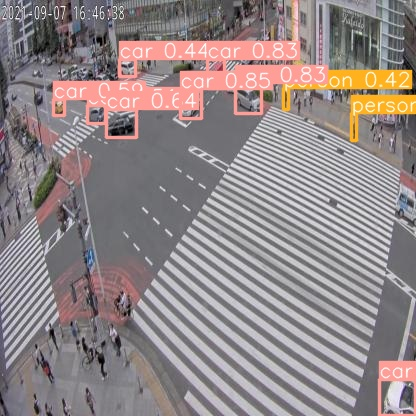

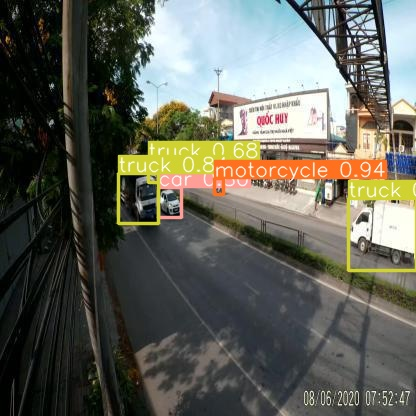

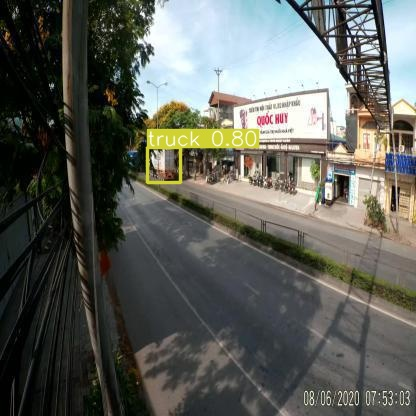

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!zip -r model.zip runs/detect/train/weights/

updating: runs/detect/train/weights/ (stored 0%)
updating: runs/detect/train/weights/last.pt (deflated 8%)
updating: runs/detect/train/weights/best.pt (deflated 8%)
